In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.backend as be

In [2]:
from utils import *
from data import *
from layers import *
from models import *

In [3]:
from models import *

In [4]:
limit_gpus()
set_gpu(0)

In [5]:
dpi=100

In [6]:
dataset = "fashion_mnist"
ds_train, ds_test, ds_info = load_dataset(dataset, 128)

input_shape = ds_info.features['image'].shape
num_classes = ds_info.features['label'].num_classes

In [7]:
x_train, y_train = get_raw_dat(ds_train)

In [8]:
x_test, y_test = get_raw_dat(ds_test)

In [9]:
xs, ys = next(iter(ds_train))

In [10]:
input_shape

(28, 28, 1)

In [11]:
model = PhasorModel(input_shape, 
                    onehot_offset=0.0, 
                    onehot_phase=0.5,
                    projection="dot",
                   
                   exec_time=5.0,
                   repeats=5,
                   max_step=0.02)

In [12]:
ys0 = model(xs)

(array([148., 122.,  75.,  74., 115., 205., 149., 100., 110., 182.]),
 array([-0.9999048 , -0.8001356 , -0.60036635, -0.40059716, -0.20082793,
        -0.0010587 ,  0.19871053,  0.39847976,  0.59824896,  0.7980182 ,
         0.9977874 ], dtype=float32),
 <BarContainer object of 10 artists>)

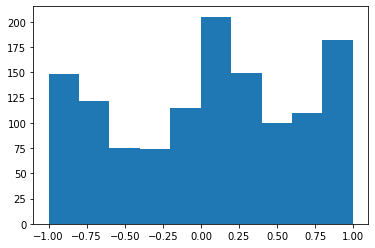

In [13]:
plt.hist(ys0.numpy().ravel())

In [14]:
model.compile(optimizer="rmsprop")

In [15]:
loss = model.train(ds_train, 1)

Training loss tf.Tensor(1.0326091, shape=(), dtype=float32)
Training loss tf.Tensor(0.04102964, shape=(), dtype=float32)
Training loss tf.Tensor(0.03754413, shape=(), dtype=float32)
Training loss tf.Tensor(0.029396454, shape=(), dtype=float32)
Training loss tf.Tensor(0.034651373, shape=(), dtype=float32)


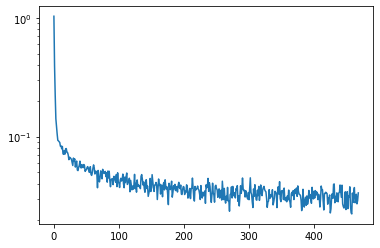

In [16]:
plt.semilogy(loss)

In [17]:
yh1 = model(xs)

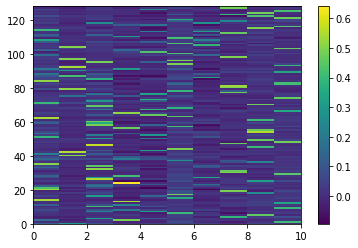

In [18]:
plt.pcolor(yh1)
plt.colorbar()

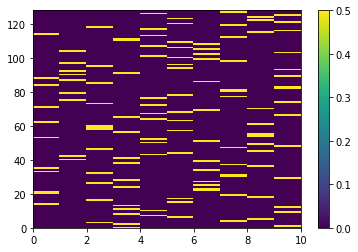

In [19]:
plt.pcolor(model.to_phase(ys))
plt.colorbar()

In [20]:
conf = model.accuracy(ds_test)

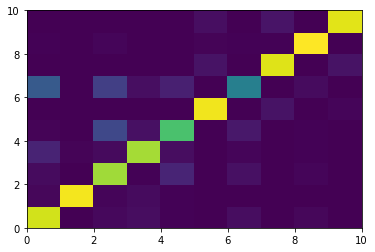

In [21]:
plt.pcolor(conf[0])

In [22]:
confusion_to_accuracy(conf)

<tf.Tensor: shape=(), dtype=float64, numpy=0.8261>

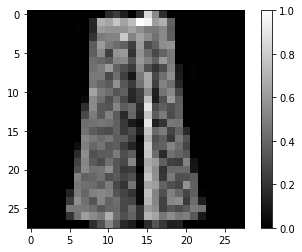

In [23]:
plt.imshow(xs[0,...], cmap="gray")
plt.colorbar()

In [24]:
preprocess = keras.Sequential([model.layers[0]])

In [25]:
input_spikes = model.phase_to_train(tf.multiply(preprocess(xs[0:10,...]), model.direction))

In [26]:
model.call_dynamic(xs[0:2,...])

100%|██████████| 2/2 [00:03<00:00,  2.00s/it]


array([[[ 0.22223745,  0.34223745,  0.18223745,  0.10223745,
          0.02223745,  0.10223745,  0.10223745,  0.10223745,
          0.14223745,  0.06223745],
        [ 0.22223745,  0.34223745,  0.18223745,  0.10223745,
          0.02223745,  0.10223745,  0.10223745,  0.10223745,
          0.14223745,  0.06223745],
        [ 0.22223745,  0.34223745,  0.18223745,  0.10223745,
          0.02223745,  0.10223745,  0.10223745,  0.10223745,
          0.14223745,  0.06223745],
        [ 0.22223745,  0.34223745,  0.18223745,  0.10223745,
          0.02223745,  0.10223745,  0.10223745,  0.10223745,
          0.14223745,  0.06223745],
        [ 0.22223745,  0.34223745,  0.18223745,  0.10223745,
          0.02223745,  0.10223745,  0.10223745,  0.10223745,
          0.14223745,  0.06223745]],

       [[ 0.0663353 ,  0.0263353 ,  0.0263353 , -0.0136647 ,
          0.        ,  0.1063353 ,  0.        ,  0.        ,
          0.0263353 ,  0.3463353 ],
        [ 0.0663353 ,  0.0263353 ,  0.0263353 , -0

Text(0.5, 1.0, 'Input Layer')

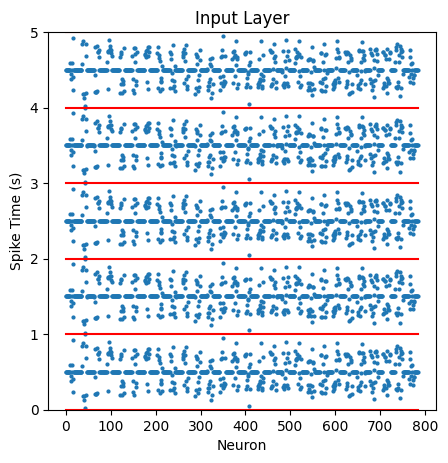

In [27]:
plt.figure(dpi=dpi, figsize=(5,5))
for i in range(10):
    plt.plot([0,784],[0.0+i,0+i], color="red")
plt.scatter(input_spikes[0][0], input_spikes[0][1], label="Input Spikes (Drive)", s=4)
#plt.scatter(dynamic_spikes[0][0], dynamic_spikes[0][1], label="Output Spikes (Response)")
#plt.xticks(lblinds, np.around(phases.ravel()[lblinds], decimals=2));

plt.xlabel("Neuron")
plt.ylabel("Spike Time (s)")
plt.ylim(0,5)
#plt.ylim(-0.5,10)
plt.title("Input Layer")

In [28]:
spk_layer1 = model.dense1.spike_trains

Text(0.5, 1.0, 'Dense 1')

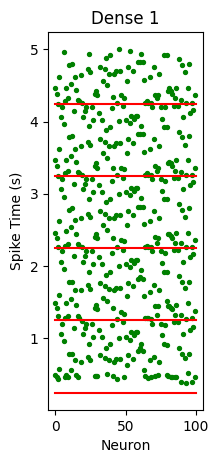

In [29]:
plt.figure(dpi=dpi, figsize=(2,5))
#plt.scatter(dynamic_input[0][0], dynamic_input[0][1], label="Input Spikes (Drive)")
for i in range(5):
    plt.plot([0,100],[0.25+i,0.25+i], color="red")
plt.scatter(spk_layer1[0][0], spk_layer1[0][1], label="Output Spikes (Response)", color="green", s=8)
#plt.xticks(lblinds, np.around(phases.ravel()[lblinds], decimals=2));
plt.xlabel("Neuron")
plt.ylabel("Spike Time (s)")
#plt.ylim(-0.5,10)
plt.title("Dense 1")

In [30]:
spk_layer2 = model.dense2.spike_trains

Text(0.5, 1.0, 'Dense 2')

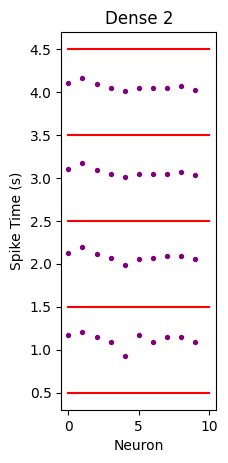

In [31]:
plt.figure(dpi=dpi, figsize=(2,5))
#plt.scatter(dynamic_input[0][0], dynamic_input[0][1], label="Input Spikes (Drive)")
for i in range(5):
    plt.plot([0,10],[0.50+i,0.50+i], color="red")
plt.scatter(spk_layer2[0][0], spk_layer2[0][1], label="Output Spikes (Response)", color="purple", s=8)
#plt.xticks(lblinds, np.around(phases.ravel()[lblinds], decimals=2));
plt.xlabel("Neuron")
plt.ylabel("Spike Time (s)")
#plt.ylim(-0.5,10)
plt.title("Dense 2")

In [32]:
#execution sensitivity test

In [33]:
points = np.logspace(2.5, 0.7, 21).astype("int")

In [34]:
points

array([316, 257, 208, 169, 138, 112,  91,  74,  60,  48,  39,  32,  26,
        21,  17,  14,  11,   9,   7,   6,   5])

In [35]:
dts = 1.0 / points

In [36]:
x_subset = x_test[0:128,...]
y_subset = y_test[0:128,...]

In [37]:
model.dyn_params

{'leakage': -0.2,
 'period': 1.0,
 'window': 0.05,
 'spk_mode': 'gradient',
 'threshold': 0.03,
 'exec_time': 5.0,
 'max_step': 0.02}

In [38]:
ys0 = model.predict(out, method="dynamic_mode")

NameError: name 'out' is not defined

In [39]:
np.mean(ys0 == y_subset)

InvalidArgumentError: cannot compute Equal as input #1(zero-based) was expected to be a float tensor but is a int64 tensor [Op:Equal]

In [40]:
dt = 0.01

In [41]:
model.dense1.max_step = dt
model.dense2.max_step = dt

In [42]:
int(np.ceil(10.0 / dt) + 1) 

1001

In [43]:
out = model.call_dynamic(x_subset[0:2,...], solver="euler", save_solutions=True)

  0%|          | 0/2 [00:00<?, ?it/s]


TypeError: object of type 'EulerSolution' has no len()

In [ ]:
model.dense1.solutions

In [ ]:
def test_sensitivity(dts):
    results = []
    
    model.dyn_params["solver"] = "euler"
    for dt in dts:
        model.dense1.max_step = dt
        model.dense2.max_step = dt
        
        out = [model.call_dynamic(x_subset, solver="euler")]
        results.append(out)

In [ ]:
dts

In [ ]:
test_sensitivity(dts)

In [ ]:
#full dynamic execution on test set - takes a few hours

In [ ]:
all_yhs = model.evaluate(ds_test, method="dynamic")

In [ ]:
np.savez_compressed("fashion_yhs_dynamic.npz", yhs=all_yhs.numpy(), ys=y_test)

In [ ]:
yhmode = model.predict(all_yhs, "mode").ravel()

In [ ]:
yhmean = model.predict(all_yhs, "dynamic_mean")

In [ ]:
np.mean(yhmode == y_test)

In [ ]:
np.mean(yhmean == y_test)

In [ ]:
zs = model.dense1.solutions[0].y

In [ ]:
zs = model.dense1.solutions[1].y

In [ ]:
zs.shape

In [ ]:
model.evaluate(ds_test)

In [ ]:
def train_and_save(num):
    model = PhasorModel(input_shape, 
                    onehot_offset=0.0, 
                    onehot_phase=0.5,
                    projection="dot",
                   
                   exec_time=5.0,
                   repeats=5,
                   max_step=0.02)
    model.compile(optimizer="rmsprop")
    loss = model.train(ds_train, 2)
    
    yh_static = model.evaluate(ds_test, method="static")
    yh_dynamic = model.evaluate(ds_test, method="dynamic")
    
    name = "fashion_model_"+str(num)+".npz"
    np.savez_compressed(name, 
                        yh_static=yh_static.numpy(),
                        yh_dynamic=yh_dynamic.numpy(),
                        ys=y_test.numpy())

In [ ]:
train_and_save(5)

In [ ]:
for i in range(4):
    train_and_save(i)

In [ ]:
train_and_save(4)

In [ ]:
for i in range(6,8):
    train_and_save(i)